In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Charger le fichier CSV depuis votre ordinateur
uploaded = files.upload()

Saving Nat_Gas (1).csv to Nat_Gas (1).csv


       Dates  Prices
0   10/31/20   10.10
1   11/30/20   10.30
2   12/31/20   11.00
3    1/31/21   10.90
4    2/28/21   10.90
5    3/31/21   10.90
6    4/30/21   10.40
7    5/31/21    9.84
8    6/30/21   10.00
9    7/31/21   10.10
10   8/31/21   10.30
11   9/30/21   10.20
12  10/31/21   10.10
13  11/30/21   11.20
14  12/31/21   11.40
15   1/31/22   11.50
16   2/28/22   11.80
17   3/31/22   11.50
18   4/30/22   10.70
19   5/31/22   10.70
20   6/30/22   10.40
21   7/31/22   10.50
22   8/31/22   10.40
23   9/30/22   10.80
24  10/31/22   11.00
25  11/30/22   11.60
26  12/31/22   11.60
27   1/31/23   12.10
28   2/28/23   11.70
29   3/31/23   12.00
30   4/30/23   11.50
31   5/31/23   11.20
32   6/30/23   10.90
33   7/31/23   11.40
34   8/31/23   11.10
35   9/30/23   11.50
36  10/31/23   11.80
37  11/30/23   12.20
38  12/31/23   12.80
39   1/31/24   12.60
40   2/29/24   12.40
41   3/31/24   12.70
42   4/30/24   12.10
43   5/31/24   11.40
44   6/30/24   11.50
45   7/31/24   11.60
46   8/31/24 

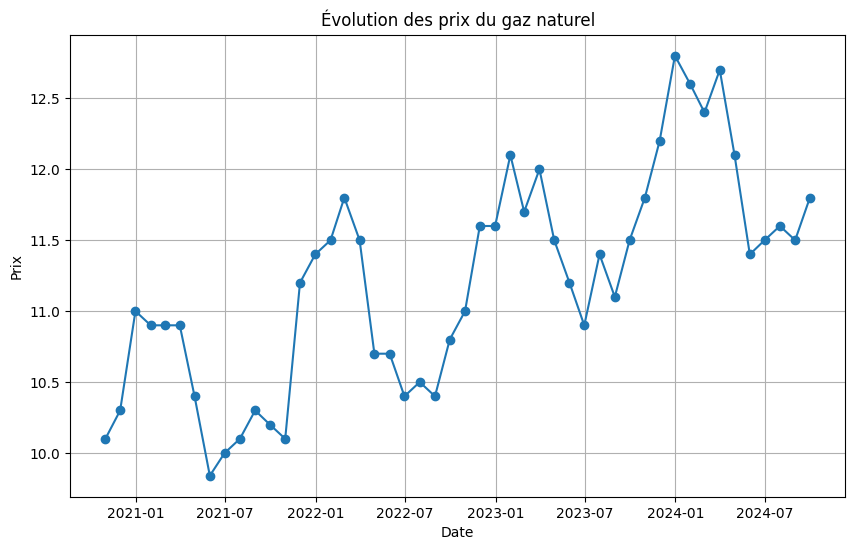

In [ ]:
# Lisez le fichier CSV en utilisant pandas
df = pd.read_csv("Nat_Gas (1).csv")

# Affichez le contenu du fichier CSV
print(df)

# Convertir la colonne 'Dates' en type datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# Tracer l'évolution des prix en fonction des dates
plt.figure(figsize=(10, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.title('Évolution des prix du gaz naturel')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

# Définir la colonne 'Dates' comme index du DataFrame
df.set_index('Dates', inplace=True)

In [ ]:
def contract_price(purchase_price, selling_price, max_volume, fixed_costs, injection_withdrawal_cost, transport_costs):
    # Calculate the difference between the selling price and the purchase price
    price_difference = selling_price - purchase_price

    # Calculate total costs
    total_costs = fixed_costs + injection_withdrawal_cost + transport_costs

    # Calculate the contract price
    contract_price = (price_difference * max_volume) - total_costs

    return contract_price

# Given parameters
injection_date = pd.Timestamp("2024-08-31")
withdrawal_date = pd.Timestamp("2024-12-31")
purchase_price = 11.5  # Purchase price of gas at the injection date
selling_price = 13.5  # Selling price FORECAST of gas at the withdrawal date
max_volume = 1000000  # Maximum volume that can be stored (1 million MMBtu)
fixed_costs = 400000  # Monthly fixed costs for using storage facilities
injection_withdrawal_cost = 10000  # Injection/withdrawal cost per million MMBtu
transport_costs = 100000  # Transport costs

# Call the function to calculate the contract price
price = contract_price(purchase_price, selling_price, max_volume, fixed_costs, injection_withdrawal_cost, transport_costs)
print("Contract price assuming the price displayed in the Excel file corresponds to 1 unit and we're dealing with 1 million units and that we forecast 13.5$ as selling price :", price)


Contract price assuming the price displayed in the Excel file corresponds to 1 unit and we're dealing with 1 million units and that we forecast 13.5$ as selling price : 1490000.0


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

def contract_price(injection_date, selling_price):
    # Calculer la différence entre le prix de vente et le prix d'achat
    difference_price = selling_price - 11.5  # Prix d'achat fixe

    # Calculer les coûts totaux
    storage_cost = 100000  # Coût de stockage fixe par mois
    injection_withdrawal_cost = 10000  # Coût d'injection/retrait fixe
    transport_cost = 50000 * 2  # Coût de transport fixe par transaction

    # Calculer le nombre de mois de stockage
    if injection_date == 'Sep 2024':
        months_storage = 1
    elif injection_date == 'Oct 2024':
        months_storage = 2
    elif injection_date == 'Nov 2024':
        months_storage = 3
    elif injection_date == 'Dec 2024':
        months_storage = 4

    # Calculer le prix du contrat
    contract_price = round((difference_price * 1000000) - ((storage_cost * months_storage) + (injection_withdrawal_cost) + (transport_cost)))

    return contract_price

# Paramètres de prix de vente pour chaque mois
selling_prices = {'Sep 2024': 11.8, 'Oct 2024': 12.2, 'Nov 2024': 12.5, 'Dec 2024': 13.5}

# Créer un widget Dropdown pour la sélection de la date d'injection
injection_date_dropdown = widgets.Dropdown(options=list(selling_prices.keys()), description='Date d\'injection')

# Définir la fonction de rappel pour calculer et afficher le prix du contrat
def on_date_change(change):
    selected_date = change['new']
    contract = contract_price(selected_date, selling_prices[selected_date])
    print(f"Prix du contrat pour {selected_date}: ${contract}")

# Associer la fonction de rappel au widget de sélection de date d'injection
injection_date_dropdown.observe(on_date_change, names='value')

# Afficher le widget de sélection de date d'injection
display(injection_date_dropdown)


Dropdown(description="Date d'injection", options=('Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024'), value='Sep …

Prix du contrat pour Oct 2024: $390000
